# 머신러닝 facebook prophet

In [0]:
# !pip install fbprophet

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from fbprophet import Prophet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
# google 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/gold/data')

In [0]:
# 데이터 불러오기
gold = pickle.load(open('gold_price.pkl','rb'))

In [0]:
# 금 가격 데이터 추출
df = gold['USD/T.oz']

In [0]:
df = pd.DataFrame(df)

In [0]:
# index reset
df.reset_index(level='Date', inplace=True)

In [0]:
# prophet 기본 형태로 열 이름 수정
df = df.rename(columns = {'Date':'ds', 'USD/T.oz':'y'})

In [0]:
# 모델 정의
mod = Prophet()
mod.fit(df)

In [0]:
# 예측
pred = mod.predict(df)

In [0]:
# r2
r2 = r2_score(df.y, pred.yhat)
print('r2: {:.3f}'.format(r2))
# rmse
rmse = mean_squared_error(df.y, pred.yhat)**0.5
print('rmse: {:.3f}'.format(rmse))
# mae
mae = mean_absolute_error(df.y, pred.yhat)
print('mae: {:.3f}'.format(mae))

r2: 0.933
rmse: 46.869
mae: 36.699


In [0]:
# future 컬럼 생성
future = mod.make_future_dataframe(periods=7)
future.tail()

,ds
2300,2019-08-03
2301,2019-08-04
2302,2019-08-05
2303,2019-08-06
2304,2019-08-07


In [0]:
# 미래 예측
forecast = mod.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2298,2019-08-01,1298.598938,1238.162937,1355.128512
2299,2019-08-02,1298.826091,1239.864214,1358.551313
2300,2019-08-03,1318.477668,1257.793795,1376.852428
2301,2019-08-04,1318.971201,1256.380459,1383.489407
2302,2019-08-05,1300.913034,1240.785164,1359.887240
2303,2019-08-06,1302.581058,1242.006328,1358.202695
2304,2019-08-07,1304.411349,1239.627617,1362.847100


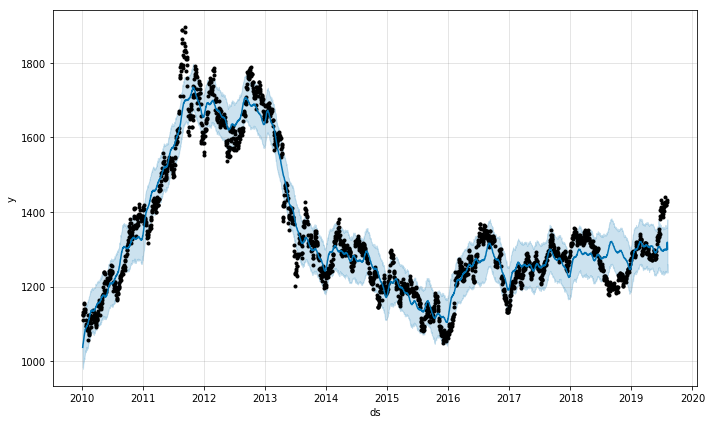

In [0]:
fig1 = mod.plot(forecast)

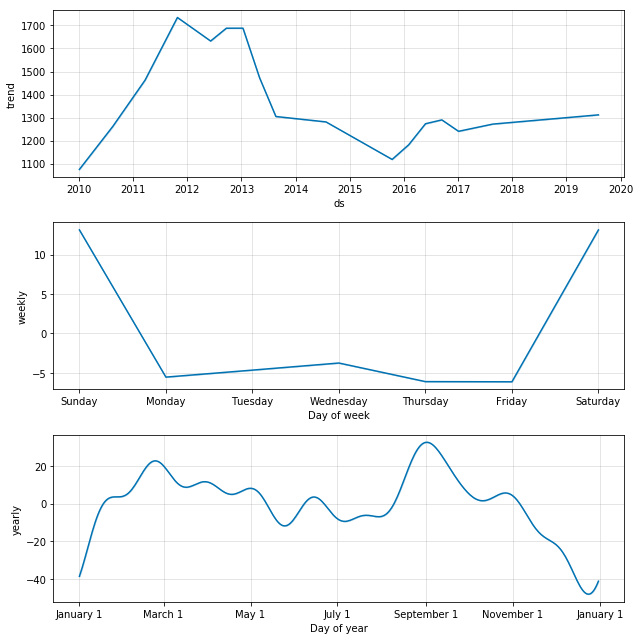

In [0]:
fig2 = mod.plot_components(forecast)